In [686]:
import pandas as pd
import numpy as np 
import scipy as py
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.svm import LinearSVC, SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn. metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Configuració warnings

import warnings
warnings.filterwarnings('ignore')

In [687]:
wines= pd.Cov   = pd.read_csv("Meu_wineData.csv",sep=';', engine='python', names=['Class label', 'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])


In [688]:
print(wines.dtypes)

Class label                       int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                  object
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object


In [689]:
# carrega el arxiu csv
pd.options.display.max_rows = 9999 #mostrar tots els registres del dataset

wines[['Color intensity']]=wines[['Color intensity']].replace(to_replace='9.899.999', value='9.9')

wines = wines.astype({'Color intensity':'float'})  # cambio a float




In [641]:
wines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [642]:
wines.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [643]:


# MODEL kNN      #un clasificador de aprendizaje supervisado , que utiliza la proximidad para hacer
                 #clasificaciones o predicciones sobre la agrupación de un punto 
# ---------

# Trovem els k veïns més propers

# Eliminem les columnes que no apliquen
wines = wines.drop("Class label", axis=1)
wines = wines.drop("Proline", axis=1)

# Eliminem la variable dependent. X: variables independents
X = wines.drop("Alcohol", axis=1)
# Convertim el dataframe en una matriu
X = X.values

#Variables dependents
y = wines["Alcohol"]
y = y.values

# Apliquem kNN amb k=3
new_wine = np.array([1.89, 2.43,17.2,96,2.70,3.23,0.31,1.99,5.40,1.01,3.02])

# Calculem las distancies entre aquest nou punt de dades i les del dataset
distances = np.linalg.norm(X - new_wine, axis=1)

# Ara tenim un vector de distancies i hem d'esbrinar quins son els tres veïns més propers
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

# Recuperem els valors d' Alcohol corresponents als ids dels veïns més propers 
nearest_neighbor_wines = y[nearest_neighbor_ids]
nearest_neighbor_wines

# Combina varis veïns en una predicció agafant la mitjana dels seus valors
prediction = nearest_neighbor_wines.mean()
# La predicció dels 3 veïns més propers per la var. Alcohol és:
prediction

13.99

In [644]:
## Métricas de clasificación

In [645]:
# La librería Scikit-Learn proporciona funciones para obtener una matriz de confusión 
y_true = [1, 1, 1, 0, 1, 0]
y_pred = [1, 1, 0, 1, 0, 0]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

In [646]:
#Accuracy, el porcentaje total de valores correctamente clasificados, tanto positivos como negativos.


#Accuracy = (TP + TN) / (TP + TN + FP + FN)
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)


0.5

In [647]:
#Precisión,  para saber qué porcentaje de valores que se han clasificado como positivos son realmente positivos.
Precision = tp / (tp + fp)
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.6666666666666666

In [648]:
#Recall,el ratio de verdaderos positivos, es utilizada para saber cuantos valores positivos son correctamente clasificados.
Recall = tp / (tp + fn)
Recall
  # la capacidad del clasificador para encontrar todas las muestras positivas

0.5

In [649]:
#F1 Score, el conjunto de datos a analizar está desbalanceado.
#Esta métrica combina el precision y el recall, para obtener un valor mucho más objetivo.
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)
F1 = 2 * ((Recall * Precision)/(Recall + Precision))
F1

0.5714285714285715

In [650]:
wines.shape


(178, 12)

In [651]:
wines['Magnesium']>100
wines['Magnesium'].unique()
pd.get_dummies(wines.Magnesium)



,70,78,80,81,82,84,85,86,87,88,...,124,126,127,128,132,134,136,139,151,162
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [652]:
wines.head(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40


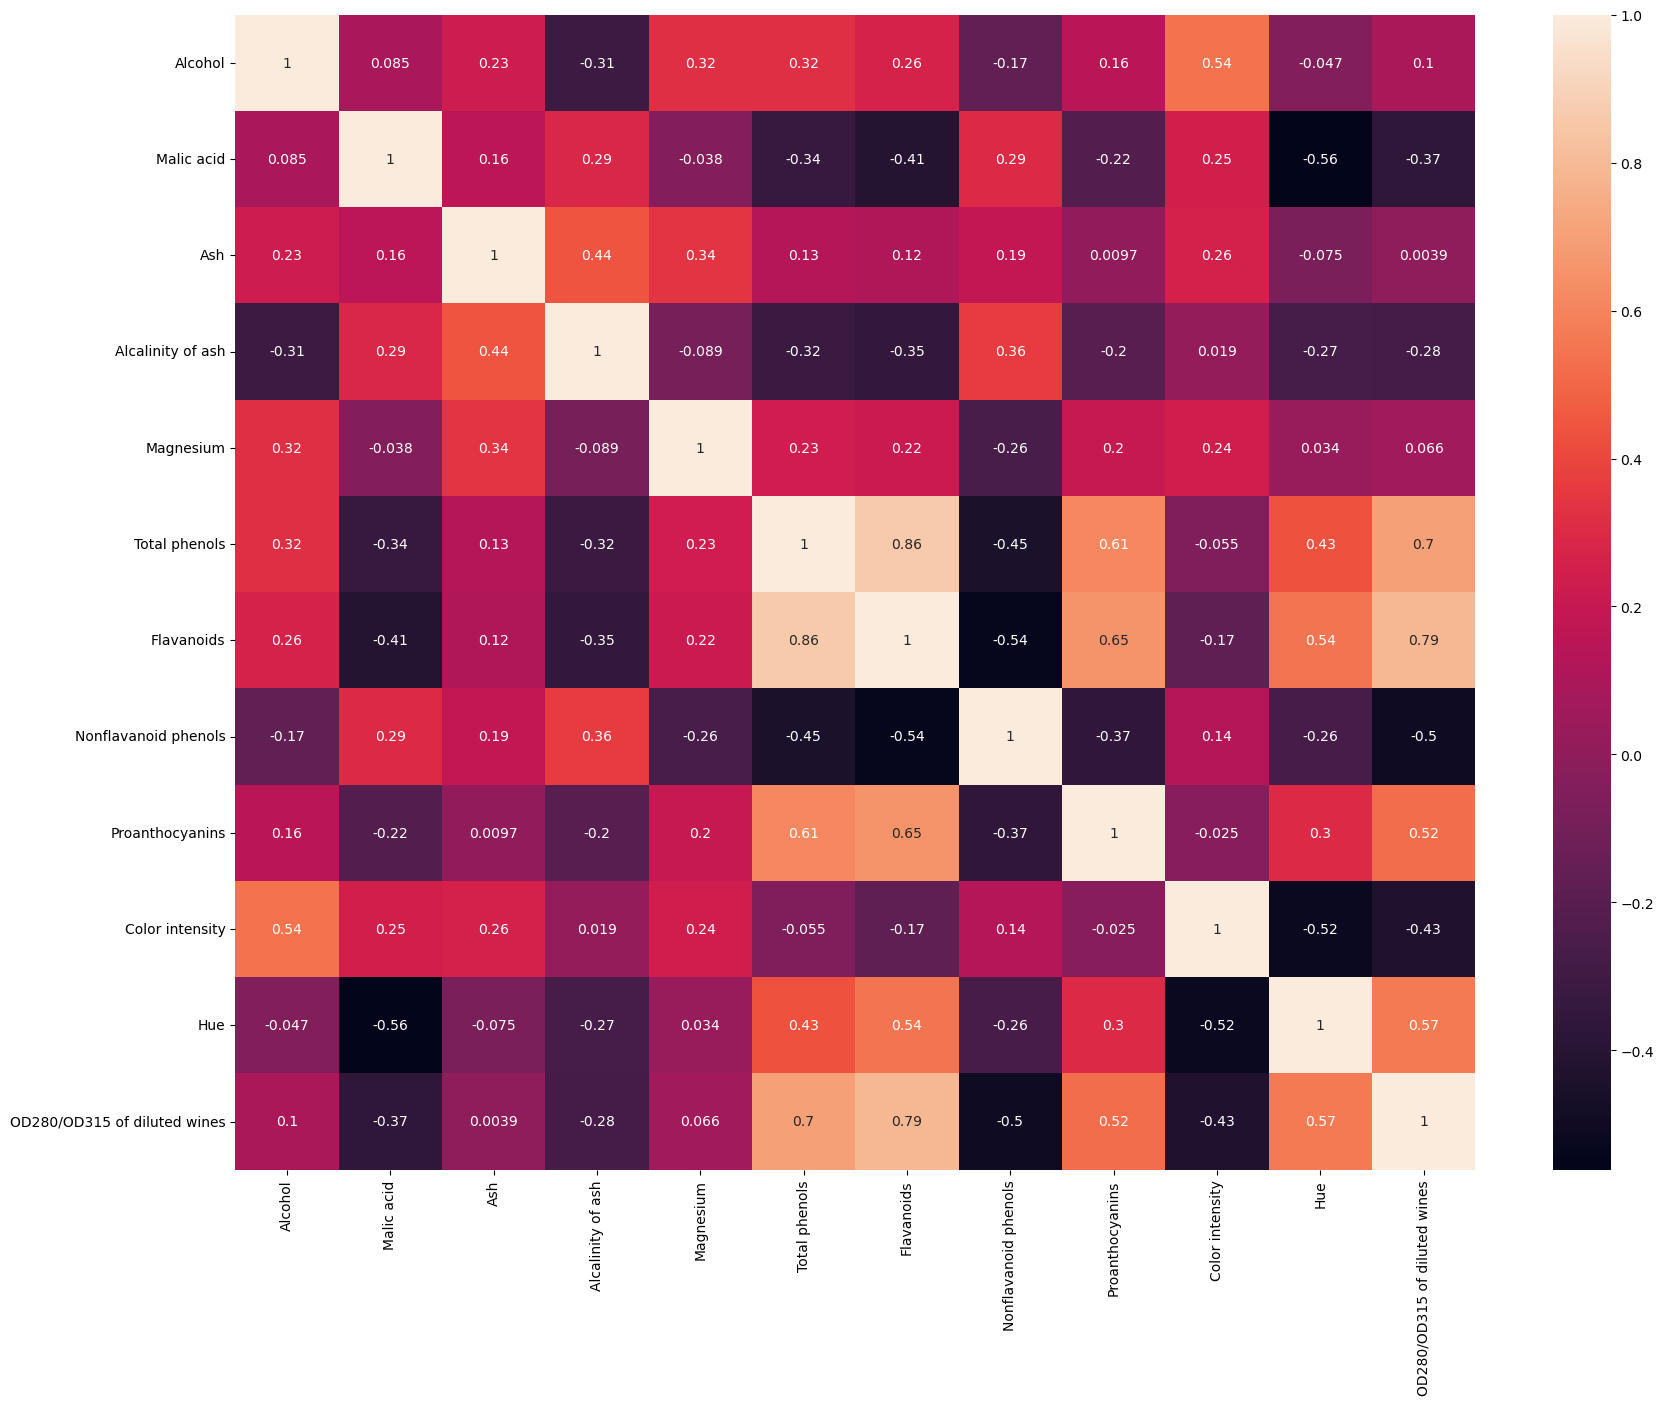

In [682]:
plt.figure(figsize=(20,15))
sns.heatmap(wines.corr(),annot=True)  # genera mapa de calor nivel de actividad color oscuro poco, claro alto

plt.show()

In [654]:
# MODEL SVM  # SVM construye un modelo capaz de predecir si un punto nuevo 
#cuya categoría desconocemos) pertenece a una categoría o a la otra.
# ---------

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

wines_encode= wines
wines_encode.Magnesium=le.fit_transform(wines_encode.Magnesium)  #Ajuste a los datos y luego transforma.
wines_encode.Alcohol=le.fit_transform(wines_encode.Alcohol)
wines_encode

(wines_encode.corr()['Magnesium'][0:-2])










Alcohol                 0.320426
Malic acid             -0.038259
Ash                     0.336261
Alcalinity of ash      -0.088906
Magnesium               1.000000
Total phenols           0.233781
Flavanoids              0.215525
Nonflavanoid phenols   -0.256624
Proanthocyanins         0.202756
Color intensity         0.243252
Name: Magnesium, dtype: float64

In [655]:
# MODEL SVM  algoritmo de aprendizaje supervisado para entrenar muestras, para las tarea de classificacíon
#    construye un modelo capaz de predecir si un punto nuevo 
#cuya categoría desconocemos, pertenece a una categoría o a la otra.
# ---------

In [656]:
from sklearn.svm import SVC
help(SVC)
X=wines_encode.drop(['Magnesium','Alcohol'],axis=1)
y=wines_encode['Magnesium']

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [657]:
from sklearn.model_selection import train_test_split   #nos permite dividir un dataset en dos bloques,
                                                      # bloques destinados al entrenamiento y validación del modelo 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [658]:
X_train.head(5)

,Malic acid,Ash,Alcalinity of ash,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines
138,3.59,2.19,19.5,1.62,0.48,0.58,0.88,5.70,0.81,1.82
104,1.73,1.98,20.5,2.20,1.92,0.32,1.48,2.94,1.04,3.57
78,0.99,1.95,14.8,1.90,1.85,0.35,2.76,3.40,1.06,2.31
36,1.64,2.84,15.5,2.60,2.68,0.34,1.36,4.60,1.09,2.78
93,2.83,2.22,18.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30


In [659]:
X_test.head(2)

,Malic acid,Ash,Alcalinity of ash,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines
19,3.10,2.56,15.2,2.70,3.03,0.17,1.66,5.10,0.96,3.36
45,4.04,2.44,18.9,2.85,2.65,0.30,1.25,5.24,0.87,3.33


In [660]:
y_train.head(5)

138     9
104     6
78     49
36     30
93      9
Name: Magnesium, dtype: int64

In [661]:
from sklearn.preprocessing import StandardScaler   # normalizar los datos

scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)

X_scaled_test = scaler.transform(X_test)
X_scaled_train

array([[ 1.08120605, -0.65212742,  0.        , ...,  0.33317435,
        -0.64137827, -1.07090115],
       [-0.61299439, -1.42753372,  0.28817977, ..., -0.93349517,
         0.34652993,  1.33076844],
       [-1.28703113, -1.53830605, -1.35444491, ..., -0.72238359,
         0.43243499, -0.39843366],
       ...,
       [-0.48547393,  0.04943066, -2.16134825, ...,  1.15926318,
         1.03377042,  0.54851034],
       [-0.79516648, -0.39365865,  0.34581572, ..., -0.88301197,
         0.00290969, -0.74152932],
       [ 0.04282513,  0.34482354,  0.43226965, ..., -0.99774653,
        -0.6843308 ,  1.07001574]])

In [662]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC(class_weight='balanced') 
from sklearn.model_selection import GridSearchCV

svc.fit(X_train,y_train)
param_grid={'C':[0.001,0.01,0.5,1],'gamma':['scaled','auto'],'kernel':['linear','rbf']}
grid=GridSearchCV(svc,param_grid)
grid.fit(X_scaled_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.0185


In [663]:
linear_svc=SVC(kernel='linear', C=1.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=1.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

#el número de clasificaciones que un modelo predice correctamente dividido por el número total de predicciones realizadas

C=1.0 Model accuracy with linear kernel : 0.0370


In [671]:
linear_svc=SVC(kernel='rbf', C=1) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=1.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=1.0 Model accuracy with linear kernel : 0.0000


In [ ]:
##

In [519]:
wines

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.040,3.92
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.050,3.40
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.030,3.17
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.860,3.45
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.040,2.93
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.050,2.85
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.020,3.58
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.060,3.58
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.080,2.85
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.010,3.55


88     13
86     11
98      9
101     9
96      8
102     7
94      6
85      6
112     6
97      5
92      5
80      5
103     5
89      5
90      4
108     4
107     4
106     4
87      3
120     3
95      3
78      3
111     3
84      3
118     3
104     3
100     3
110     3
116     3
93      2
115     2
91      2
105     2
113     2
162     1
134     1
119     1
82      1
122     1
81      1
70      1
127     1
132     1
99      1
136     1
139     1
151     1
117     1
128     1
124     1
126     1
121     1
123     1
Name: Magnesium, dtype: int64


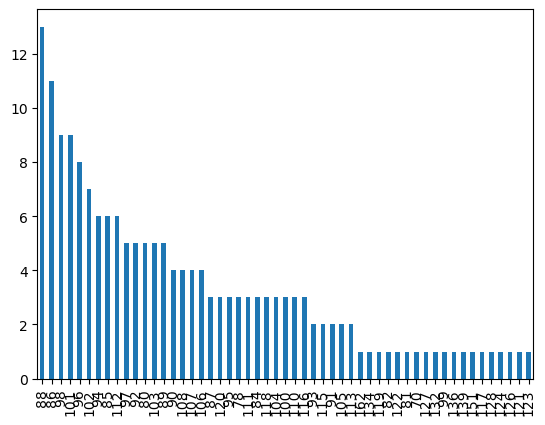

In [511]:
print(wines.Magnesium.value_counts())
wines.Magnesium.value_counts().plot(kind='bar')
plt.show()

In [512]:
X=wines.iloc[: , 1:14].values  #División de datos en tren y prueba
y=wines.iloc[: ,-1].values

In [291]:
X

array([[ 1.71,  2.43, 15.6 , ...,  5.64,  1.04,  3.92],
       [ 1.78,  2.14, 11.2 , ...,  4.38,  1.05,  3.4 ],
       [ 2.36,  2.67, 18.6 , ...,  5.68,  1.03,  3.17],
       ...,
       [ 4.28,  2.26, 20.  , ..., 10.2 ,  0.59,  1.56],
       [ 2.59,  2.37, 20.  , ...,  9.3 ,  0.6 ,  1.62],
       [ 4.1 ,  2.74, 24.5 , ...,  9.2 ,  0.61,  1.6 ]])

In [513]:
y

array([3.92, 3.4 , 3.17, 3.45, 2.93, 2.85, 3.58, 3.58, 2.85, 3.55, 3.17,
       2.82, 2.9 , 2.73, 3.  , 2.88, 2.65, 2.57, 2.82, 3.36, 3.71, 3.52,
       4.  , 3.63, 3.82, 3.2 , 3.22, 2.77, 3.4 , 3.59, 2.71, 2.88, 2.87,
       3.  , 2.87, 3.47, 2.78, 2.51, 2.69, 3.53, 3.38, 3.  , 3.56, 3.  ,
       3.35, 3.33, 3.44, 3.33, 2.75, 3.1 , 2.91, 3.37, 3.26, 2.93, 3.2 ,
       3.03, 3.31, 2.84, 2.87, 1.82, 1.67, 1.59, 2.46, 2.87, 2.23, 2.3 ,
       3.18, 3.48, 1.93, 3.07, 1.82, 3.16, 2.78, 3.5 , 3.13, 2.14, 2.48,
       2.52, 2.31, 3.13, 3.12, 3.14, 2.72, 2.01, 3.08, 3.16, 2.26, 3.21,
       2.75, 3.21, 2.27, 2.65, 2.06, 3.3 , 2.96, 2.63, 2.26, 2.74, 2.77,
       2.83, 2.96, 2.77, 3.38, 2.44, 3.57, 3.3 , 3.17, 2.42, 3.02, 3.26,
       2.81, 2.78, 2.5 , 2.31, 3.19, 2.87, 3.33, 2.96, 2.12, 3.05, 3.39,
       3.69, 3.12, 3.1 , 3.64, 3.28, 2.84, 2.44, 2.78, 2.57, 1.29, 1.42,
       1.36, 1.29, 1.51, 1.58, 1.27, 1.69, 1.82, 2.15, 2.31, 2.47, 2.06,
       2.05, 2.  , 1.68, 1.33, 1.86, 1.62, 1.33, 1.

In [514]:
from sklearn.metrics import classification_report          
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))
#precision    recall  f1-score   support   # Cuántas predicciones son Verdaderas y cuántas son Falsa

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



array([[<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Malic acid'}>,
        <AxesSubplot:title={'center':'Ash'}>],
       [<AxesSubplot:title={'center':'Alcalinity of ash'}>,
        <AxesSubplot:title={'center':'Magnesium'}>,
        <AxesSubplot:title={'center':'Total phenols'}>],
       [<AxesSubplot:title={'center':'Flavanoids'}>,
        <AxesSubplot:title={'center':'Nonflavanoid phenols'}>,
        <AxesSubplot:title={'center':'Proanthocyanins'}>],
       [<AxesSubplot:title={'center':'Color intensity'}>,
        <AxesSubplot:title={'center':'Hue'}>,
        <AxesSubplot:title={'center':'OD280/OD315 of diluted wines'}>]],
      dtype=object)

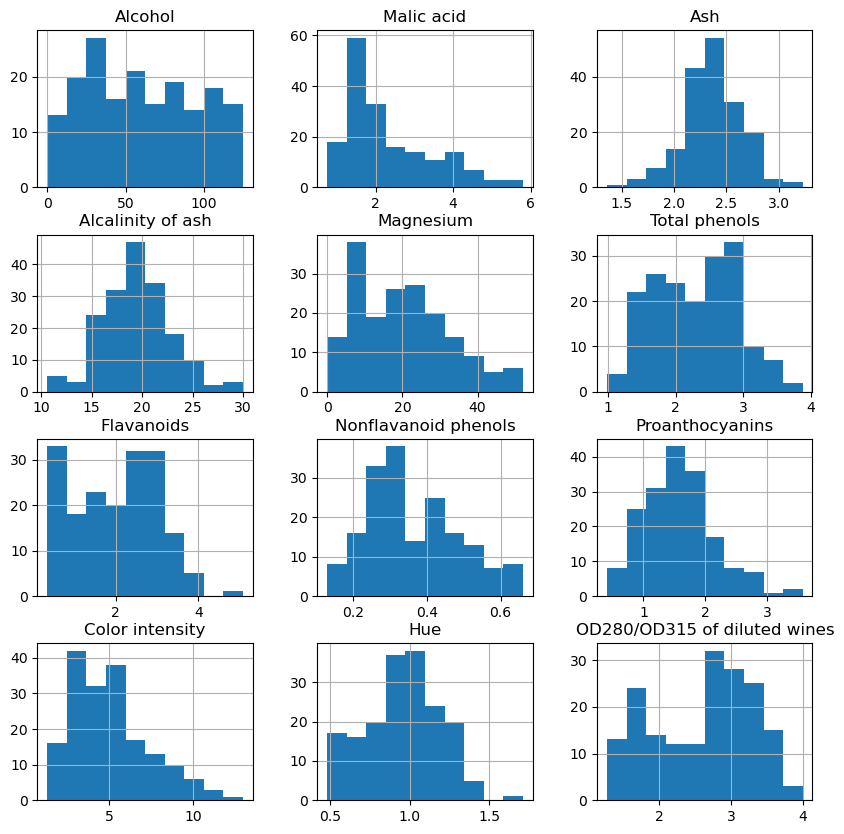

In [679]:
wines.hist(figsize = (10,10))

<AxesSubplot:xlabel='Magnesium', ylabel='Density'>

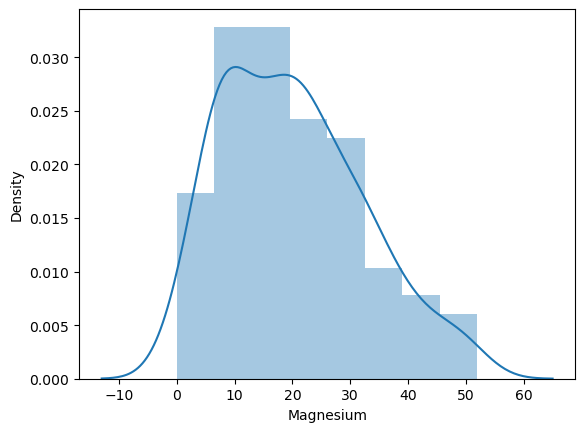

In [680]:
sns.distplot( wines['Magnesium'])